In [1]:
# 곱셈 계층

# 5.4.1 곱셈 계층
class MulLayer:
    def __init__(self):  # 값 초기화
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x   #매개변수를 전역변수에 저장
        self.y = y
        out = x * y   # 순전파 곱셈
        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

In [3]:
# 5.4.2 덧셈 계층
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [4]:
if __name__ == '__main__':
    # 문제1의 예시
    apple = 100
    apple_num = 2 #사과의 개수
    tax = 1.1 #소비세

    # 계층들
    mul_apple_layer = MulLayer()
    mul_tax_layer = MulLayer()

    # 순전파
    apple_price = mul_apple_layer.forward(apple, apple_num)
    price = mul_tax_layer.forward(apple_price, tax)

    print(price)  # 220.0
    
       # 역전파
    dprice = 1
    dapple_price, dtax = mul_tax_layer.backward(dprice)
    dapple, dapple_num = mul_apple_layer.backward(dapple_price)

    print(dapple, dapple_num, dtax)  # 2.2 110.0 200

220.00000000000003
2.2 110.00000000000001 200


In [5]:
    # 문제2의 예시
    orange = 150
    orange_num = 3

    # 계층들
    mul_apple_layer = MulLayer()
    mul_orange_layer = MulLayer()
    add_apple_orange_layer = AddLayer()
    mul_tax_layer = MulLayer()

    # 순전파
    apple_price = mul_apple_layer.forward(apple, apple_num)
    orange_price = mul_orange_layer.forward(orange, orange_num)
    all_price = add_apple_orange_layer.forward(apple_price, orange_price)
    price = mul_tax_layer.forward(all_price, tax)

    print(price)  # 715.0

    # 역전파
    dprice = 1
    dall_price, dtax = mul_tax_layer.backward(dprice)
    dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
    dornage, dorange_num = mul_orange_layer.backward(dorange_price)
    dapple, dapple_num = mul_apple_layer.backward(dapple_price)

    print(dapple_num, dapple, dornage, dorange_num, dtax)
    # 110.0 2.2 3.3 165.0 650

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


## 5.5 활성화 함수 계층 구현

신경망을 구성하는 층 각각을 클래스 하나로 구현합니다. <br>
우선은 활성화 함수인 ReLU와 Sigmoid 계층을 구현하겠습니다. 

###  ReLU 계층

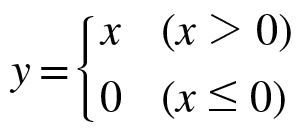

x 에 대한 y에 미분

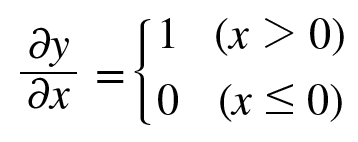

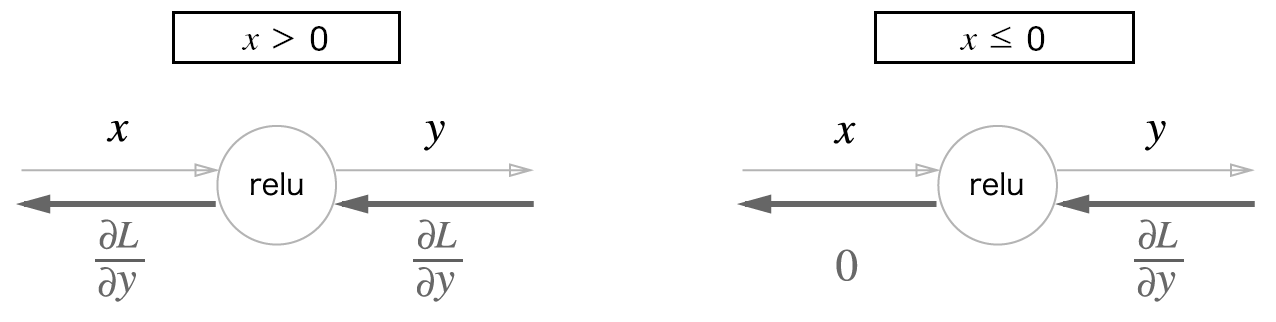

In [6]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0) #0 이하일 경우 True 0보다 클 경우 False
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

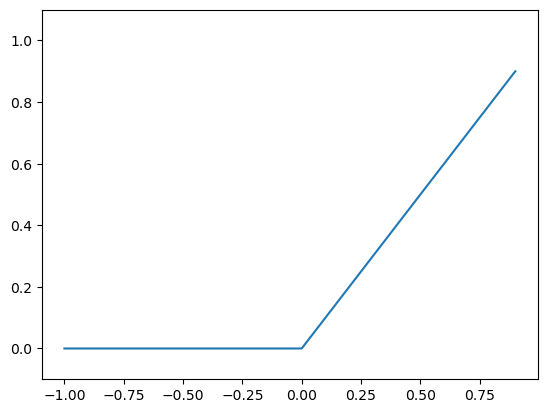

In [9]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0,x)

x =np.arange(-1.0,1.0,0.1)
y =relu(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

numpy.maximum()함수는 배열 요소의 요소 별 최대 값을 찾는 데 사용됩니다.

두 배열을 비교하고 요소별 최대값을 포함하는 새 배열을 반환합니다. 비교되는 요소 중 하나가 NaN이면 해당 요소가 반환됩니다. 두 요소가 모두 NaN이면 첫 번째 요소가 반환됩니다.

In [13]:
x = np.array([[1.0,-0.5],[-2.0,3.0]])
print(x)
mask = (x<=0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


https://www.youtube.com/watch?v=bpBdSDEGViA

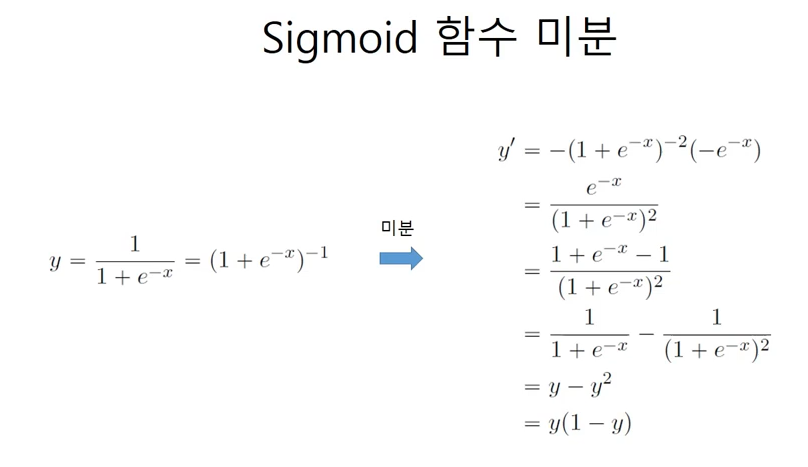

시그모이드 함수의 미분이 사칙연선처럼 간단하게 바뀐다.  계산 비용이 줄어든다. 



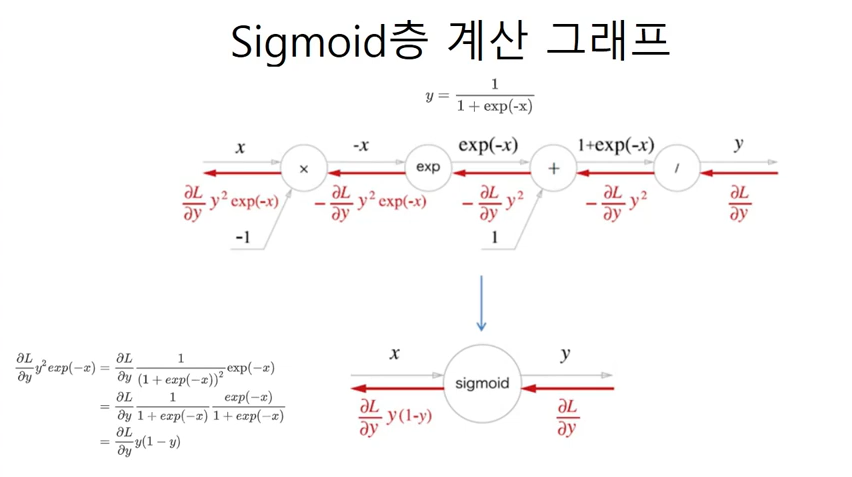

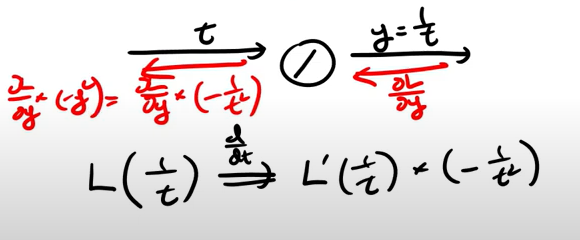

In [5]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

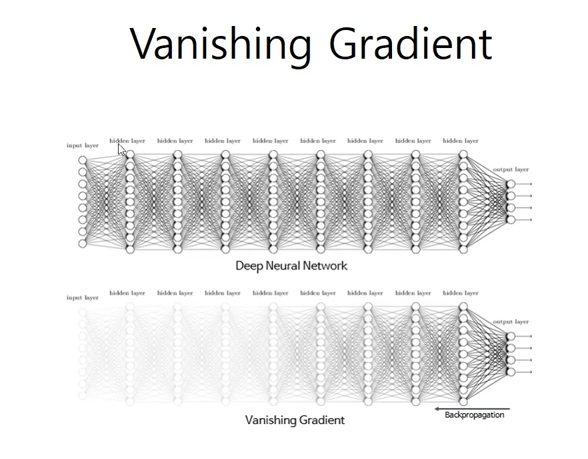

층을 여러개를 쌓으면 기울기 소실 문제가 발생한다. 시그모이드는 기울기가 매우 작다 . (직선) 그래서 원점에서 멀어질 수록 점점 작은 값을 곱하기 때문에 고층은 학습은 되는데 저층은 학습이 안 일어난다. 
억제방법중에 RELU함수로 바꾸는 법이 있다. 1을 곱하거나 0을 곱하기 때문에 1을 곱한부분은 끝가지 살아간다. 

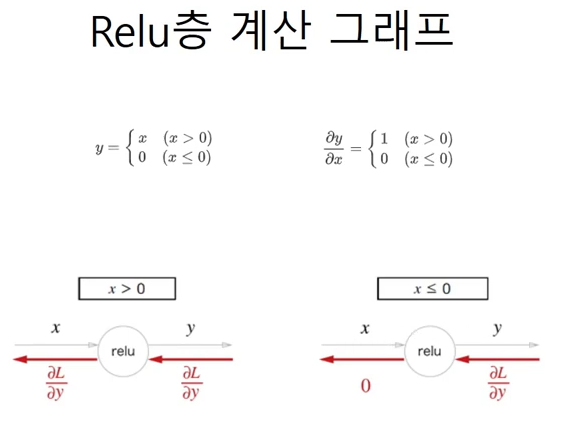

입력된 값이 양수일 경우 그대로 보내고 아니면 아예 0으로 만들어버린다. 

In [13]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0) #X  =[1,-2,3,-4]
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx # dx = [1,,0,3,0]

In [7]:
bts = Relu()

In [8]:
bts.forward(np.array([1,-2,3,-4]))

array([1, 0, 3, 0])

In [9]:
bts.mask

array([False,  True, False,  True])

In [12]:
bts.backward(np.array([1,-2,3,-4]))

array([1, 0, 3, 0])